In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:

df=pd.read_csv('All Project/Hotel_Reviews.csv')



In [4]:
df.columns

Index(['Hotel_Address', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

### Which hotel reviews are in good, bad or average category?

Total Bad Category Hotel: 21


Average_Score
5.2                                   Hotel Liberty
6.4                                 Hotel Cavendish
6.4                           Savoy Hotel Amsterdam
6.6                               The Tophams Hotel
6.6        Best Western Maitrise Hotel Edgware Road
6.7                                 Commodore Hotel
6.7                    Ibis Styles Milano Palmanova
6.8                                   Villa Eugenie
6.8                         Bloomsbury Palace Hotel
6.9                              Gainsborough Hotel
6.9    Hallmark Hotel London Chigwell Prince Regent
6.9                      Idea Hotel Milano San Siro
7.0                            Park Lane Mews Hotel
7.0                                      Henry VIII
7.0                         Villa Lut ce Port Royal
7.0                             Hotel Royal Elys es
7.0                              Gran Hotel Barcino
7.0                          London Elizabeth Hotel
7.0                         Eurohotel Diagonal Por

Total Average Category Hotel: 283


Average_Score
7.0                  Park Lane Mews Hotel
7.0                            Henry VIII
7.0               Villa Lut ce Port Royal
7.0                   Hotel Royal Elys es
7.0                    Gran Hotel Barcino
                      ...                
8.0                       Hotel Carrobbio
8.0                    Atahotel Linea Uno
8.0                Hotel Vondel Amsterdam
8.0    Hotel Pension Baron am Schottentor
8.0            Suite Hotel 900 m zur Oper
Name: Hotel_Name, Length: 283, dtype: object

Total Good Category Hotel: 1255


Average_Score
8.0                       The Principal London
8.0    Mercure Paris Tour Eiffel Pont Mirabeau
8.0              Crowne Plaza Paris R publique
8.0     Doubletree by Hilton London Kensington
8.0             Shepherd s Bush Boutique Hotel
                        ...                   
9.6                                         41
9.6                          Hotel Casa Camper
9.6                           Hotel The Serras
9.6                      H10 Casa Mimosa 4 Sup
9.8                                 Ritz Paris
Name: Hotel_Name, Length: 1255, dtype: object

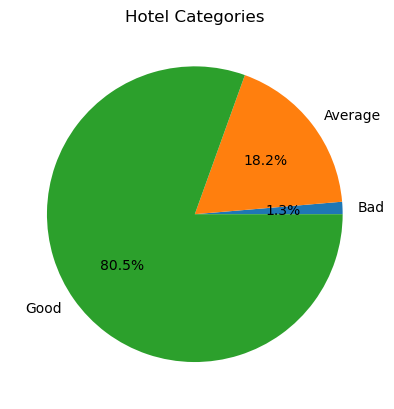

In [20]:
# Define score ranges and category labels
score_ranges = [(5, 7), (7, 8), (8, 11)]
category_labels = ['Bad', 'Average', 'Good']

hotel_counts = []  # to store the number of hotels in each category

for i, (lower, upper) in enumerate(score_ranges):
    # Filter the dataframe to only include hotels within the current score range
    category_df = df[(df['Average_Score'] >= lower) & (df['Average_Score'] <= upper)]
    
    # Group the hotels by their average score and get a list of unique hotel names
    category_hotels = category_df.groupby('Average_Score')['Hotel_Name'].unique()
    
    # Print the total number and list of up to 10 hotels in the current category
    hotel_list = category_hotels.explode()[:10]  # Get the first 10 hotels from the exploded list
    print(f'Total {category_labels[i]} Category Hotel: {len(hotel_list)}')
    display(hotel_list)
    
    # Count the number of hotels in the current category
    hotel_counts.append(len(hotel_list))


# Plot a pie chart of the hotel counts
plt.pie(hotel_counts, labels=category_labels, autopct='%1.1f%%')
plt.title('Hotel Categories')
plt.show()


### The top ten hotels received the most positive words and the least negative words

In [6]:
# Review_Total_Positive_Word_Counts

Review_word_category = df.groupby('Hotel_Name').agg({'Review_Total_Positive_Word_Counts': 'sum'}).sort_values(by='Review_Total_Positive_Word_Counts', ascending=False).head(10)
display(Review_word_category)

# Review_Total_Negative_Word_Counts

Review_word_category=df.groupby('Hotel_Name').agg({'Review_Total_Negative_Word_Counts':'sum'}).sort_values(by='Review_Total_Negative_Word_Counts', ascending=True).head(10)

# print(Review_word_category
display(Review_word_category)  


,Review_Total_Positive_Word_Counts
Hotel_Name,
Park Plaza Westminster Bridge London,66532
Strand Palace Hotel,56897
Britannia International Hotel Canary Wharf,55582
Intercontinental London The O2,50471
Copthorne Tara Hotel London Kensington,50067
DoubleTree by Hilton Hotel London Tower of London,50061
Grand Royale London Hyde Park,47296
Best Western Premier Hotel Couture,42884
citizenM Tower of London,41117


,Review_Total_Negative_Word_Counts
Hotel_Name,
Hotel Wagner,45
Hotel Eiffel Blomet,117
Boundary Rooms Suites,120
Renaissance Paris Republique Hotel Spa,123
Melia Paris Champs Elys es,140
COMO The Halkin,147
Hotel Stendhal Place Vend me Paris MGallery by Sofitel,153
Hotel Dupond Smith,155
Gartenhotel Altmannsdorf Hotel 1,160


### The top ten hotels received the least  positive words and the most negative words

In [7]:
# Review_Total_Positive_Word_Counts

Review_word_category = df.groupby('Hotel_Name').agg({'Review_Total_Positive_Word_Counts': 'sum'}).sort_values(by='Review_Total_Positive_Word_Counts', ascending=True).head(10)
display(Review_word_category)

# Review_Total_Negative_Word_Counts

Review_word_category=df.groupby('Hotel_Name').agg({'Review_Total_Negative_Word_Counts':'sum'}).sort_values(by='Review_Total_Negative_Word_Counts', ascending=False).head(10)

# print(Review_word_category
display(Review_word_category)  

,Review_Total_Positive_Word_Counts
Hotel_Name,
Le Lavoisier,107
AC Hotel Irla a Marriott Lifestyle Hotel,127
Pershing Hall,130
Hotel Wagner,148
Renaissance Paris Republique Hotel Spa,160
Melia Paris Champs Elys es,166
Ibis Styles Paris Gare Saint Lazare,174
Hotel Daniel Paris,184
Mercure Paris Porte d Orleans,187


,Review_Total_Negative_Word_Counts
Hotel_Name,
Britannia International Hotel Canary Wharf,124089
Park Plaza Westminster Bridge London,85727
Strand Palace Hotel,76687
Holiday Inn London Kensington,75255
Copthorne Tara Hotel London Kensington,67252
Hilton London Metropole,65762
Grand Royale London Hyde Park,65713
DoubleTree by Hilton Hotel London Tower of London,57308
Millennium Gloucester Hotel London,56877


### Hotel Categories by Negative to Positive Word Ratio

In [19]:
# Calculate the average ratio of negative to positive words for each hotel
reviews = df.groupby('Hotel_Name').agg({
    'Review_Total_Positive_Word_Counts': 'sum',
    'Review_Total_Negative_Word_Counts': 'sum'
})
reviews['Ratio'] = reviews['Review_Total_Negative_Word_Counts'] / reviews['Review_Total_Positive_Word_Counts']



# Categorize each hotel as good, bad, or average based on its ratio
categories = {
    'bad': reviews[reviews['Ratio'] >= 2.5].index.tolist(),
    'average': reviews[(reviews['Ratio'] >= 1) & (reviews['Ratio'] < 2.5)].index.tolist(),
    'good': reviews[reviews['Ratio'] < 1].index.tolist()
}


# Print the list of hotels and their categories for each category
for category in categories:
    print(f'{category.title()} Category Hotel List:')
    print(f'Total {category.title()} Category Hotel: {len(categories[category])}')
    display(pd.DataFrame(categories[category], columns=['Hotel_Name']).head(10))
    print()

    
    






Bad Category Hotel List:
Total Bad Category Hotel: 15


,Hotel_Name
0,Best Western Maitrise Hotel Edgware Road
1,Commodore Hotel
2,Gran Hotel Barcino
3,Hallmark Hotel London Chigwell Prince Regent
4,Holiday Inn Paris Montparnasse Pasteur
5,Hotel Liberty
6,Hotel Parco di Sch nbrunn Vienna
7,Ibis Styles Paris Gare Saint Lazare
8,Idea Hotel Milano San Siro
9,Kube Hotel Ice Bar



Average Category Hotel List:
Total Average Category Hotel: 656


,Hotel_Name
0,1K Hotel
1,88 Studios
2,ABaC Restaurant Hotel Barcelona GL Monumento
3,AC Hotel Barcelona Forum a Marriott Lifestyle ...
4,AC Hotel Diagonal L Illa a Marriott Lifestyle ...
5,AC Hotel Irla a Marriott Lifestyle Hotel
6,AC Hotel Milano a Marriott Lifestyle Hotel
7,AC Hotel Sants a Marriott Lifestyle Hotel
8,ADI Hotel Poliziano Fiera
9,ARCOTEL Kaiserwasser Superior



Good Category Hotel List:
Total Good Category Hotel: 821


,Hotel_Name
0,11 Cadogan Gardens
1,25hours Hotel beim MuseumsQuartier
2,41
3,45 Park Lane Dorchester Collection
4,9Hotel Republique
5,A La Villa Madame
6,AC Hotel Paris Porte Maillot by Marriott
7,AC Hotel Victoria Suites a Marriott Lifestyle ...
8,ADI Doria Grand Hotel
9,Acad mie H tel Saint Germain


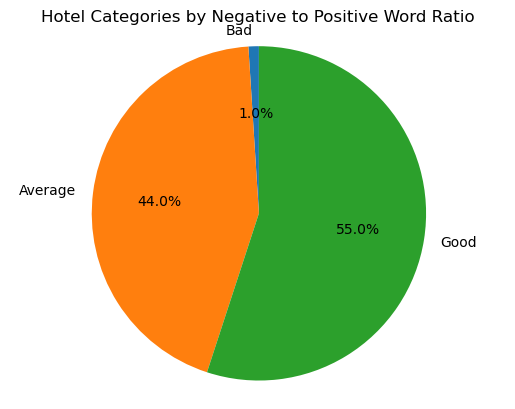

In [9]:
category_counts = {category.title(): len(categories[category]) for category in categories}
labels = list(category_counts.keys())
sizes = list(category_counts.values())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title('Hotel Categories by Negative to Positive Word Ratio')
plt.show()

### Which country people gave more reviews?

In [10]:
R_Nationality=df.groupby('Reviewer_Nationality').agg({'Average_Score':'mean'}).sort_values(by='Average_Score',ascending=False).head(10)


display(R_Nationality)

,Average_Score
Reviewer_Nationality,
Cape Verde,9.000000
Saint Kitts and Nevis,8.922222
Congo,8.833333
Svalbard Jan Mayen,8.800000
Madagascar,8.787500
French Polynesia,8.733333
U S Virgin Islands,8.717647
Liberia,8.700000
Central Africa Republic,8.700000


### Which country people gave more positive reviews?

In [11]:
# Reviewer_Nationality

R_Nationality=df.groupby('Reviewer_Nationality').agg({'Review_Total_Positive_Word_Counts':'sum'}).sort_values(by='Review_Total_Positive_Word_Counts' ,ascending=False).head(10)
display(R_Nationality)

,Review_Total_Positive_Word_Counts
Reviewer_Nationality,
United Kingdom,4314105
United States of America,822221
Australia,448859
Ireland,276687
Canada,169498
Germany,159059
Netherlands,157497
Switzerland,153294
United Arab Emirates,150186


### Which country people gave more negative reviews?

In [12]:
R_Nationality=df.groupby('Reviewer_Nationality').agg({'Review_Total_Negative_Word_Counts':'sum'}).sort_values(by='Review_Total_Negative_Word_Counts', ascending=False).head(10)
display(R_Nationality)

,Review_Total_Negative_Word_Counts
Reviewer_Nationality,
United Kingdom,4633796
United States of America,666957
Australia,372904
Ireland,287074
United Arab Emirates,186668
Switzerland,184425
Netherlands,176971
Germany,175561
Canada,149465


### Which hotel received the most and least reviewers?

In [13]:
()
print('Most received reviewers hotel list(Top 10):')
reviews_by_hotel = df.groupby('Hotel_Name').agg({'Total_Number_of_Reviews': 'sum'}).rename(columns={'Total_Number_of_Reviews': 'Total_Number_of_Reviews'}).sort_values('Total_Number_of_Reviews', ascending=False).head(10)
display(reviews_by_hotel)


print('Least received reviewers hotel list(Top 10):')
reviews_by_hotel = df.groupby('Hotel_Name').agg({'Total_Number_of_Reviews': 'sum'}).rename(columns={'Total_Number_of_Reviews': 'Total_Number_of_Reviews'}).sort_values('Total_Number_of_Reviews', ascending=True).replace(to_replace={'Total_Number_of_Reviews': 0}, value=' ')
subset = reviews_by_hotel.iloc[352:362]
display(subset)




Most received reviewers hotel list(Top 10):


,Total_Number_of_Reviews
Hotel_Name,
Park Plaza Westminster Bridge London,50686702
Britannia International Hotel Canary Wharf,43512854
Strand Palace Hotel,40721408
Hotel Da Vinci,31289590
Copthorne Tara Hotel London Kensington,25421690
DoubleTree by Hilton Hotel London Tower of London,24061092
Grand Royale London Hyde Park,19342362
Hilton London Metropole,18335556
Holiday Inn London Kensington,16455760


Least received reviewers hotel list(Top 10):


,Total_Number_of_Reviews
Hotel_Name,
Gran Hotel Barcino,36736
Timhotel Op ra Grands Magasins,36814
Hotel Mercure La Sorbonne Saint Germain des Pr s,37120
Mokinba Hotels Montebianco,37289
Vice Versa,37583
Hotel La Place,37625
Hotel Bristol,37668
Hotel Magna Pars Small Luxury Hotels of the World,37682
H tel De Vend me,37825


### Distribution of Review Sentiments

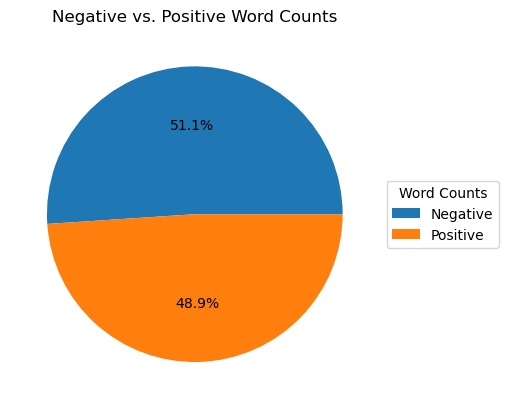

In [14]:
import matplotlib.pyplot as plt

# Calculate the sum of the negative and positive word counts
negative_sum = df['Review_Total_Negative_Word_Counts'].sum()
positive_sum = df['Review_Total_Positive_Word_Counts'].sum()

# Create the pie chart
counts = [negative_sum, positive_sum]
labels = ['Negative', 'Positive']



# Create the pie chart
fig, ax = plt.subplots()
ax.pie(counts, autopct='%1.1f%%')
ax.set_title('Negative vs. Positive Word Counts')

# Create the legend
ax.legend(labels,
          title="Word Counts",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()


### Most Positive word Use in Positive Review.

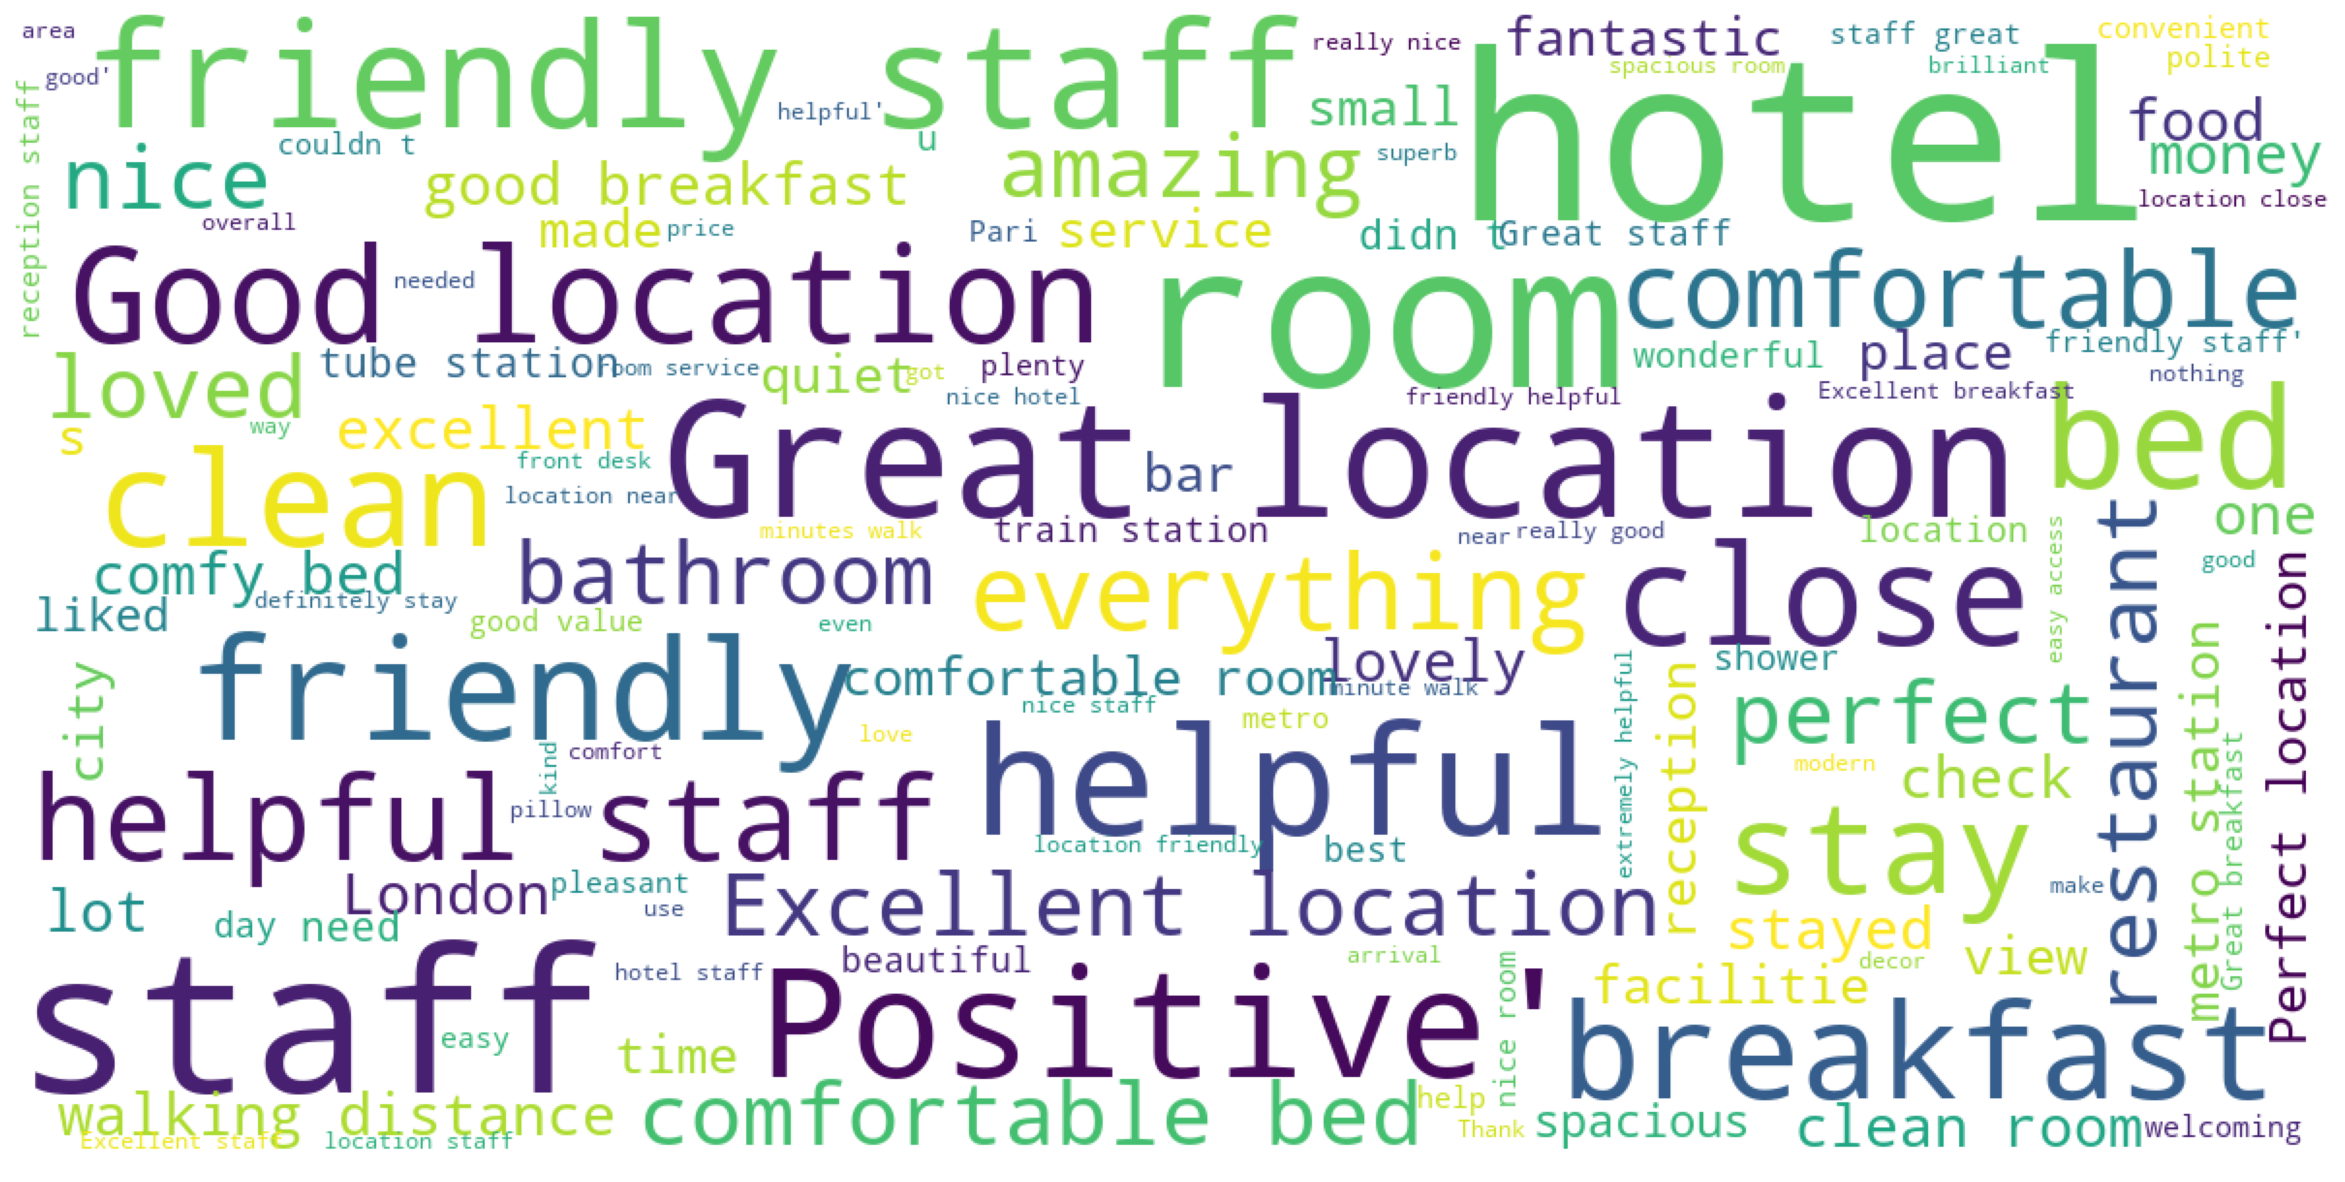

In [15]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (30, 30))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Positive_Review"].astype(str).tolist())


### Most Negtive word Use in Negtive Review.

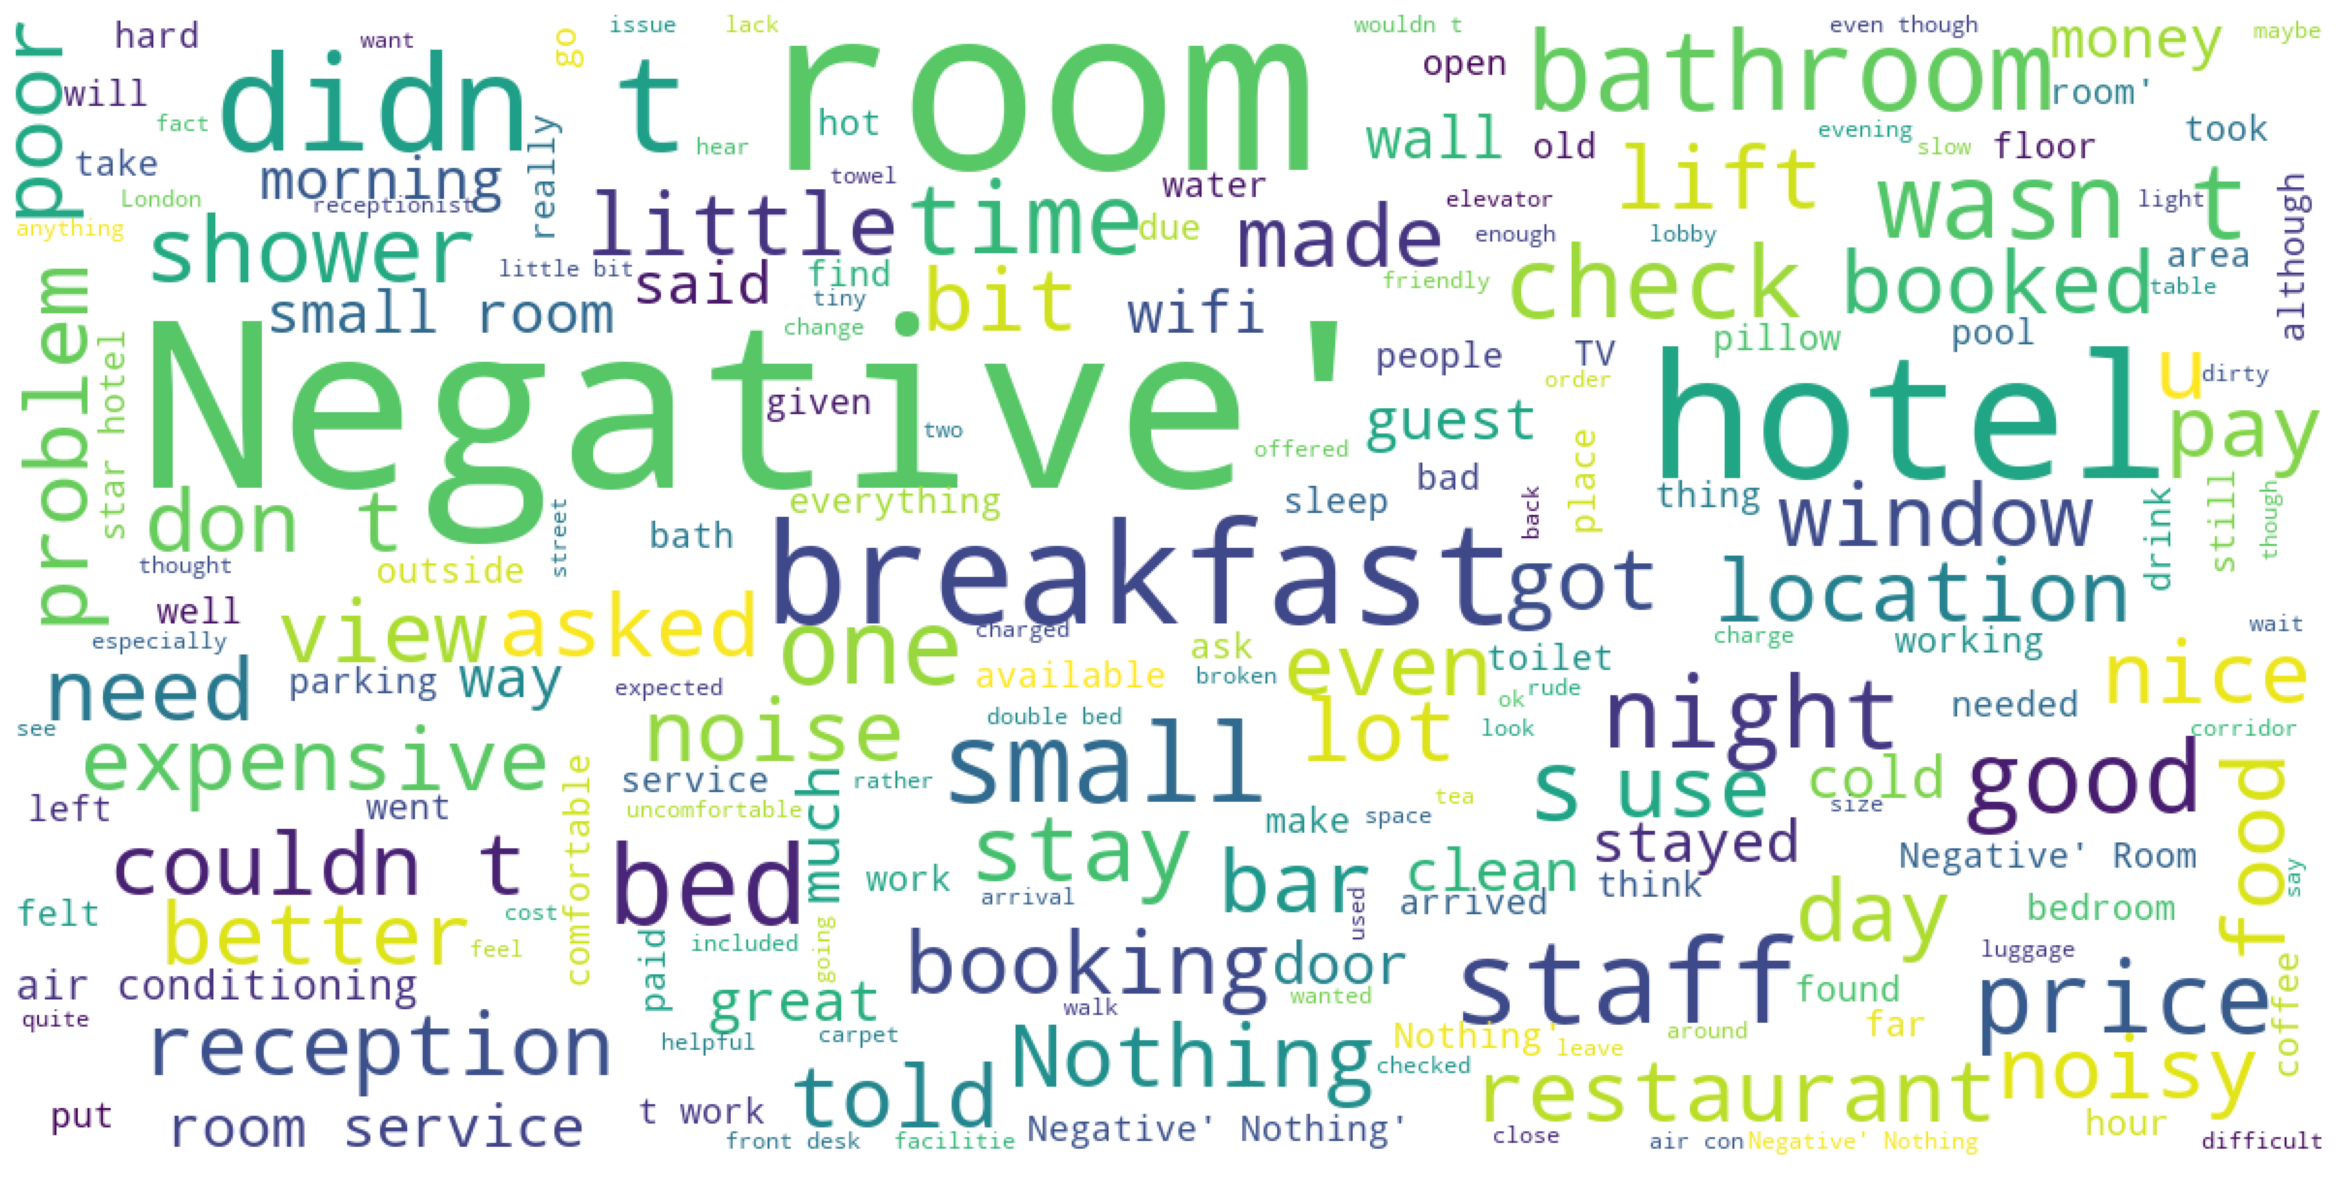

In [16]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (30, 30))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Negative_Review"].astype(str).tolist())
